In [1]:
import warnings
import pandas as pd
import numpy as np
import numpy.ma as ma
import sys
# path to the utils.py file
# update as needed
sys.path.append('/home/NETID/lundvm/code/CorticalCultureAnalysis/spike_window_analysis/')
from utils import extract_sequence, plot_sequence
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# load spike data
with warnings.catch_warnings():
    warnings.simplefilter(action='ignore', category=FutureWarning)
    spikes = pd.read_csv('/home/NETID/lundvm/data/spikes.csv')
# load burst data
num_timesteps = 600000000 #known from the settings of the simulation
time_steps = np.arange(num_timesteps)
spike_count = np.vstack((time_steps, np.append(np.bincount(spikes['time_step'].values), np.array([0]))))
num_spikes = spike_count.shape[1]

In [3]:
bursts = pd.read_csv('/home/NETID/lundvm/data/allAvalBurst.csv')
min_ibi = min(bursts['IBI'].values)
max_ibi = max(bursts['IBI'].values)
ibi_mean = np.mean(bursts['IBI'].values)
ibi_std = np.std(bursts['IBI'].values)
burst_start_mask = np.in1d(spike_count[0], bursts['StartT'].values)
num_bursts = bursts['StartT'].values.shape[0]

In [4]:
print('Simulation statistics: ')
print('Length of the simulation: ' + str(num_timesteps) + ' timesteps')
print('Min IBI: ' + str(min_ibi) + ' timesteps')
print('Max IBI: ' + str(max_ibi) + ' timesteps')
print('Mean IBI: ' + str(round(ibi_mean, 2)) + ' timesteps, with standartd deviation of ' + str(round(ibi_std, 2)))
print('Number of bursts: ' + str(num_bursts))
print('Number of spikes: ' + str(num_spikes))

Simulation statistics: 
Length of the simulation: 600000000 timesteps
Min IBI: 5445 timesteps
Max IBI: 96710222 timesteps
Mean IBI: 60193.15 timesteps, with standartd deviation of 980557.12
Number of bursts: 9729
Number of spikes: 600000000


100%|██████████| 600000000/600000000 [02:15<00:00, 4423132.82it/s]


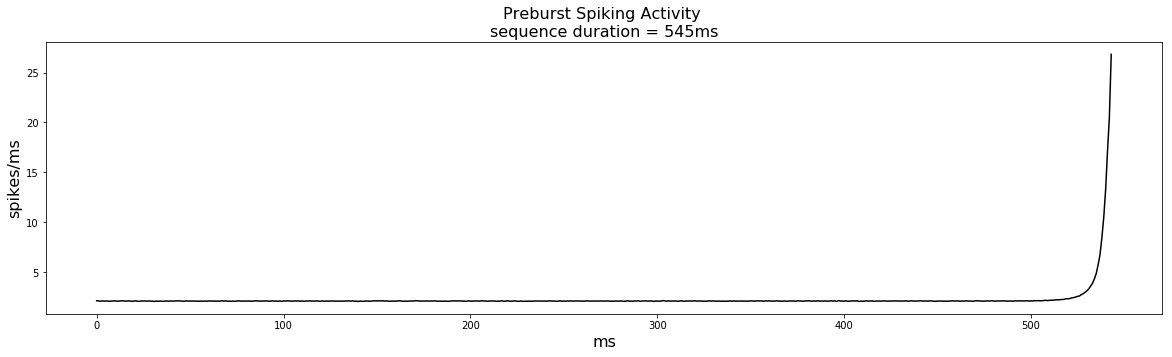

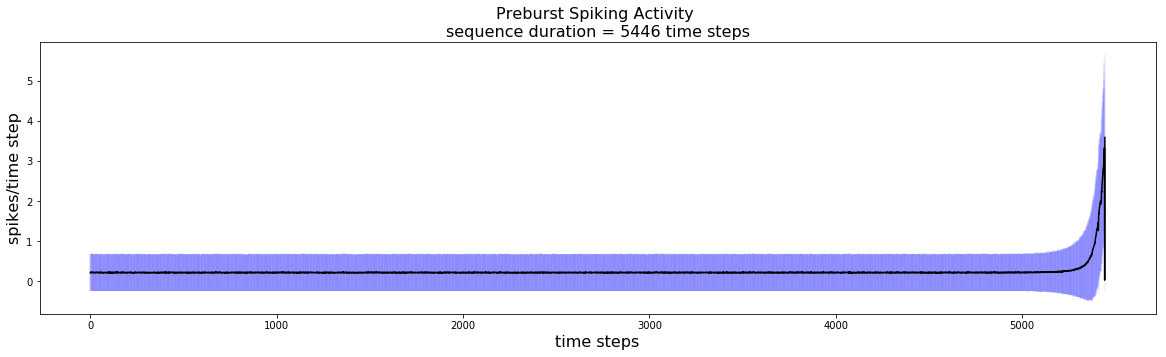

In [5]:
preburst_min = extract_sequence(spike_count, num_bursts, burst_start_mask, min_ibi, 1, into_burst=1)
plot_sequence(preburst_min, 1, (20, 5), binned=True)
plot_sequence(preburst_min, 1, (20, 5), with_std=True)

100%|██████████| 600000000/600000000 [02:13<00:00, 4486575.31it/s]


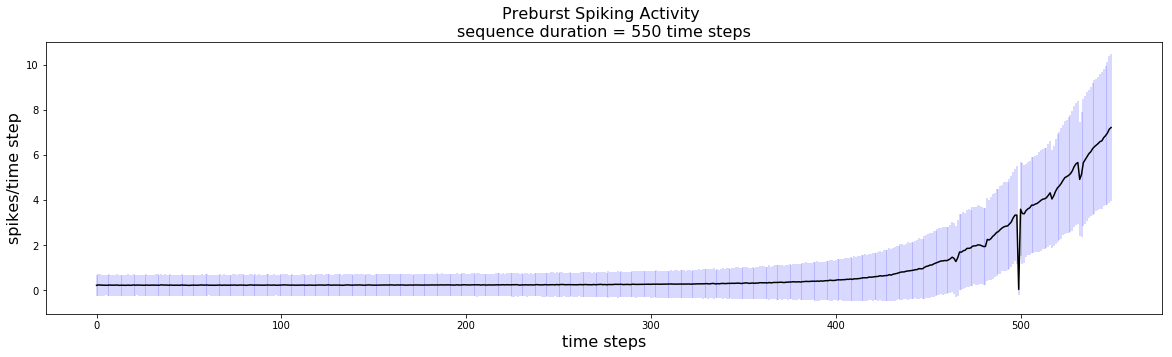

In [6]:
preburst_500 = extract_sequence(spike_count, num_bursts, burst_start_mask, 500, 1, into_burst=50)
plot_sequence(preburst_500, 1, (20, 5), elw=0.3, with_std=True)

100%|██████████| 600000000/600000000 [02:17<00:00, 4373632.97it/s]


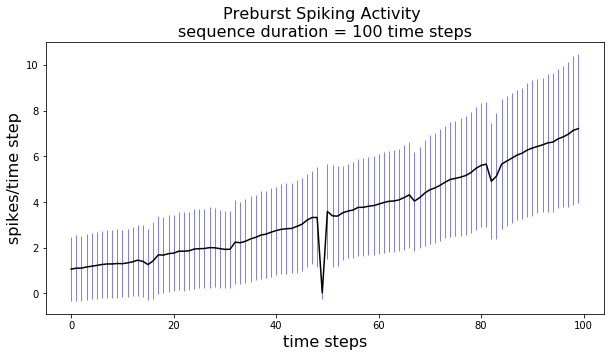

In [7]:
preburst_50 = extract_sequence(spike_count, num_bursts, burst_start_mask, 50, 1, into_burst=50)
plot_sequence(preburst_50, 1, (10, 5), elw=0.5, with_std=True)